[1.01628767]
[[-2.44597988]]
[3.85818122]
[[-0.93272694 -0.09865307 -2.51826528 -0.03339524]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       549
           1       0.74      0.74      0.74       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891

<module 'pandas' from 'D:\\MscIT part1\\software\\lib\\site-packages\\pandas\\__init__.py'>


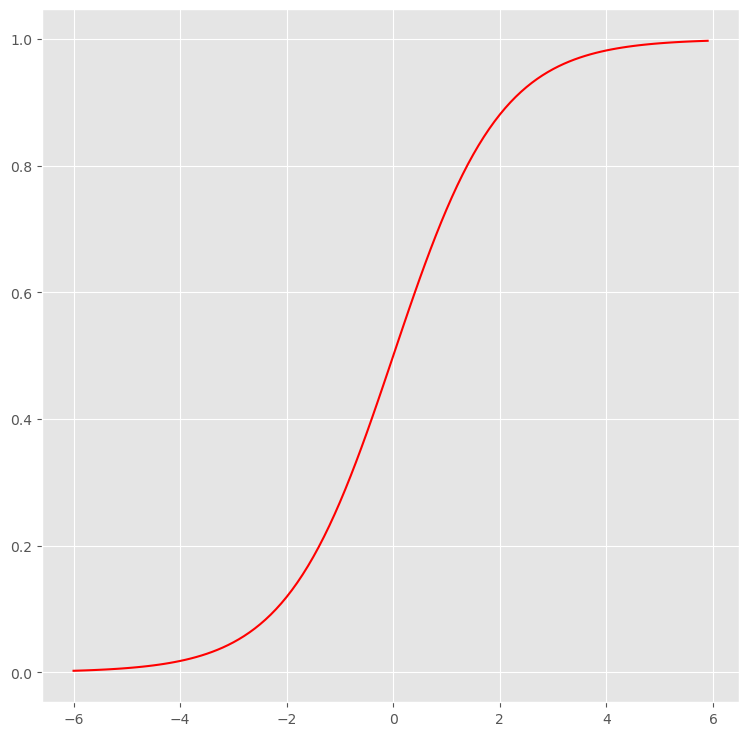

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics

matplotlib.style.use('ggplot')
plt.figure(figsize=(9, 9))


def sigmoid(t):  # Define the sigmoid function
    return 1 / (1 + np.e ** (-t))


plot_range = np.arange(-6, 6, 0.1)
y_values = sigmoid(plot_range)
# Plot curve
plt.plot(plot_range,  # X-axis range
         y_values,  # Predicted values
         color="red")
titanic_train = pd.read_csv("F:/MscIT P1 SEM 1/Research in computing/RIC-Pracitcal_Data/Practical-10/titanic_train.csv")  # Read the data
char_cabin = titanic_train["Cabin"].astype(str)  # Convert cabin to str
new_Cabin = np.array([cabin[0] for cabin in char_cabin])  # Take first letter
titanic_train["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var
# Impute median Age for NA Age values
new_age_var = np.where(titanic_train["Age"].isnull(),  # Logical check
                       28,  # Value if check is true
                       titanic_train["Age"])  # Value if check is false
titanic_train["Age"] = new_age_var
label_encoder = preprocessing.LabelEncoder()
# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])
# Initialize logistic regression model
log_model = linear_model.LogisticRegression()
# Train the model
log_model.fit(X=pd.DataFrame(encoded_sex),
              y=titanic_train["Survived"])
# Check trained model intercept
print(log_model.intercept_)
# Check trained model coefficients
print(log_model.coef_)
# Make predictions
preds = log_model.predict_proba(X=pd.DataFrame(encoded_sex))
preds = pd.DataFrame(preds)
preds.columns = ["Death_prob", "Survival_prob"]
# Generate table of predictions vs Sex
pd.crosstab(titanic_train["Sex"], preds.loc[:, "Survival_prob"])
# Convert more variables to numeric
encoded_class = label_encoder.fit_transform(titanic_train["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_train["Cabin"])
train_features = pd.DataFrame([encoded_class,
                               encoded_cabin,
                               encoded_sex,
                               titanic_train["Age"]]).T
# Initialize logistic regression model
log_model = linear_model.LogisticRegression()
# Train the model
log_model.fit(X=train_features,
              y=titanic_train["Survived"])
# Check trained model intercept
print(log_model.intercept_)
# Check trained model coefficients
print(log_model.coef_)
# Make predictions
preds = log_model.predict(X=train_features)
# Generate table of predictions vs actual
pd.crosstab(preds, titanic_train["Survived"])
log_model.score(X=train_features,
                y=titanic_train["Survived"])
metrics.confusion_matrix(y_true=titanic_train["Survived"],  # True labels
                         y_pred=preds)  # Predicted labels
# View summary of common classification metrics
print(metrics.classification_report(y_true=titanic_train["Survived"],
                                    y_pred=preds))
# Read and prepare test data
titanic_test = pd.read_csv("F:/MscIT P1 SEM 1/Research in computing/RIC-Pracitcal_Data/Practical-10/titanic_test.csv")  # Read the data
char_cabin = titanic_test["Cabin"].astype(str)  # Convert cabin to str
new_Cabin = np.array([cabin[0] for cabin in char_cabin])  # Take first letter
titanic_test["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var
# Impute median Age for NA Age values
new_age_var = np.where(titanic_test["Age"].isnull(),  # Logical check
                       28,  # Value if check is true
                       titanic_test["Age"])  # Value if check is false
titanic_test["Age"] = new_age_var
# Convert test variables to match model features
encoded_sex = label_encoder.fit_transform(titanic_test["Sex"])
encoded_class = label_encoder.fit_transform(titanic_test["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_test["Cabin"])
test_features = pd.DataFrame([encoded_class,
                              encoded_cabin, encoded_sex, titanic_test["Age"]]).T

# Make test set predictions
test_preds = log_model.predict(X=test_features)
# Create a submission for Kaggle
submission = pd.DataFrame({"PassengerId": titanic_test["PassengerId"],
                           "Survived": test_preds})
# Save submission to CSV
submission.to_csv("tutorial_logreg_submission.csv",
                  index=False)  # Do not save index values
print(pd)
